<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de clientes

Crear un modelo de segmentación para la estimación de los tipos de clientes que van de compras a un shoping<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Mall_Customers.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv > Mall_Customers.csv
    else:
        !wget Mall_Customers.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv

--2021-02-24 22:05:48--  http://mall_customers.csv/
Resolving mall_customers.csv (mall_customers.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘mall_customers.csv’
--2021-02-24 22:05:48--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2021-02-24 22:05:48 (81.1 MB/s) - ‘Mall_Customers.csv’ saved [3981/3981]

FINISHED --2021-02-24 22:05:48--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.9K in 0s (81.1 MB/s)


### `Mall_Customers.csv`:
El dataset **`Mall_Customers.csv`** contiene datos sobre clientes que asisten al shopping a comprar, y sus características de consumo.<br>
[Dataset source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- **CustomerID** --> id del comprador, ejemplo 5
- **Gender** --> género, masculino (Male) o femenino (female)
- **Age** --> edad
- **Annual Income** --> ingreso de dinero anual de la persona en miles de dolares
- **Spending socre** --> que tan gastador es la persona (de 1 a 100)

In [4]:
df = pd.read_csv("Mall_Customers.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [9]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.shape

(200, 5)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# Alumno: Los algoritmos de clustering no funcionan bien con las variables categóricas, 
# obtener un nuevo dataset (df2) sin la columna CustomerID y Gender
df_1 = df.drop(['CustomerID', 'Gender'], axis=1)
df_1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [19]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
des = df_1.describe()
des.loc['Nan'] = df_1.isna().sum()
des.loc['%Nan'] = (df_1.isna().mean())*100
des

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000
Nan,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000


In [22]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
df_1.shape
print(f'Las columnas a analizar son' , df_1.shape[1],'y las filas son ', df_1.shape[0])

Las columnas a analizar son 3 y las filas son  200


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

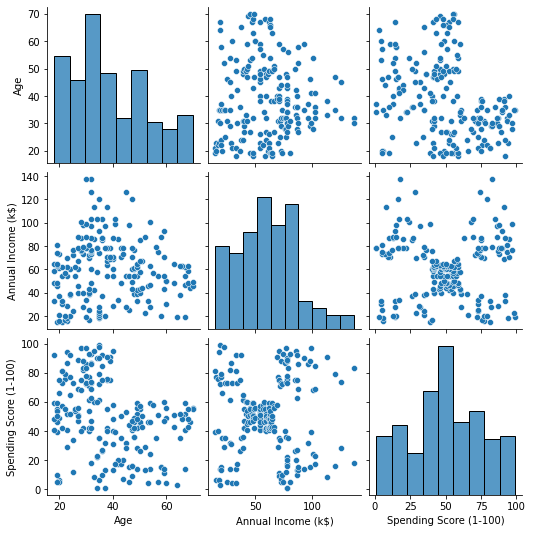

In [23]:
# Observar todas las relaciones entre todos los features, utilizar pairplot
sns.pairplot(df_1)

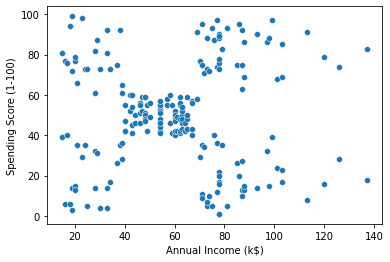

In [25]:
# Alumno: Se puede observar que donde se ve claramente una segmentación de grupos
# en en la relación de "Annual Income" y "Spending Socre"
# Graficar unicamente la relación x=Annual Income con y=SpendingScore
# con un scatter plot
sns.scatterplot(x=df_1['Annual Income (k$)'], y=df_1['Spending Score (1-100)'])

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [47]:
# Almuno: Crear un numpy array "X" con los features de entrada (Annual Income y Spending Score)
df_2 = df_1.drop(['Age'], axis=1)   # crear un dataframe NO teniendo en cuenta la columna Age
X = np.array(df_2)    # crear una array con los datos de df_2

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [58]:
# Almuno: Entrenar diferentes modelos de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion

n_clusters = list(range(2, 11))
ensayos = len(n_clusters)

# iniciar ssd y score con array de ceros con longitud=ensayos
ssd = np.zeros((ensayos))
score = np.zeros((ensayos))

for i in range(ensayos):
    kmeans = KMeans(n_clusters=n_clusters[i], init="k-means++", random_state=0)
    kmeans.fit(X)
    ssd[i] = kmeans.inertia_
    score[i] = silhouette_score(X, kmeans.labels_)

<function matplotlib.pyplot.show>

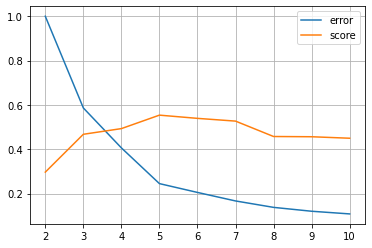

In [59]:
# Dibujar la evolucion del error (inertia) y deteminar el 
# punto de quiebre (elbow point) para deteminar el mejor k
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n_clusters, ssd/ssd.max(), label='error')
ax.plot(n_clusters, score, label='score')
ax.grid('dashed')
ax.legend()
plt.show

In [61]:
# Alumno: Entrenar el modelo con el mejor "K" encontrado
# y determinar los labels

# Elijo 5 por ser el último elbow point (azul) y score máximo (naranja)
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

In [63]:
# Alumno: Sumar la columna de labels con el nombre de custseg (customer segmentation)
# a su dataset
df_1['custseg'] = labels      # agrega columna costseg con valores de labels
df_1

,Age,Annual Income (k$),Spending Score (1-100),custseg
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,4
197,32,126,74,2
198,32,137,18,4


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [65]:
# Alumno: Calcular la exactitud (accuracy) del modelo
score = silhouette_score (X, kmeans.labels_)
score

0.553931997444648

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

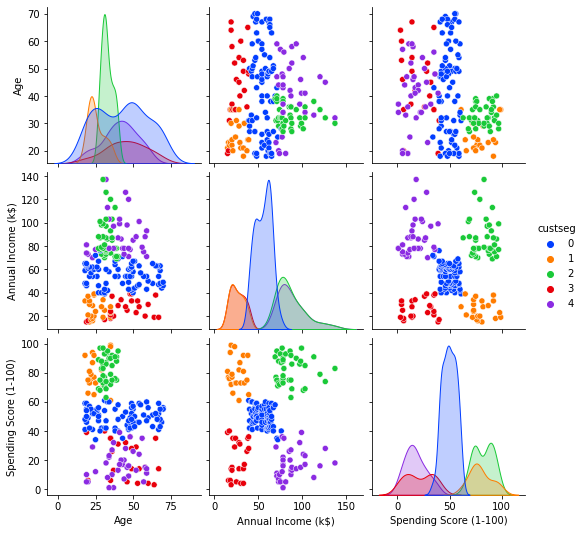

In [71]:
# Alumno: Volver a repetir el gráfico de scatter "Annual Income" y "Spending Socre"
# pero ahora coloreando con "hue" los puntos según su clase de custseg
sns.pairplot(df_1, hue='custseg', palette='bright')